<a href="https://colab.research.google.com/github/murselcr/forecasting-time-series/blob/main/forecasting_lstm_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


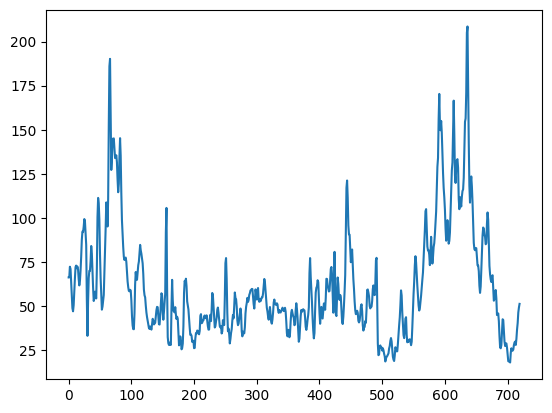

In [ ]:
dataset = pd.read_excel('eskişehir hava durumu.xlsx', usecols=[1] )
dataset["ET"] = [float(str(i).replace(",", ".")) for i in dataset["ET"]]
plt.plot(dataset)
plt.show()


In [ ]:
dataset= dataset.values
dataset= dataset.astype('float32')


In [ ]:
scaler = MinMaxScaler()
dataset =  scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)


In [ ]:
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Eğitim veri seti boyutu:", len(train_data))
print("Test veri seti boyutu:", len(test_data))


Eğitim veri seti boyutu: 503
Test veri seti boyutu: 217


In [ ]:
import numpy as np

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back=1


In [ ]:
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)
print(len(trainX), len(trainY))
print(len(testX), len(testY))


501 501
215 215


In [ ]:
testY = scaler.inverse_transform(testY.reshape(-1, 1))
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
501/501 - 4s - loss: 0.0155 - 4s/epoch - 8ms/step
Epoch 2/100
501/501 - 1s - loss: 0.0086 - 885ms/epoch - 2ms/step
Epoch 3/100
501/501 - 1s - loss: 0.0051 - 916ms/epoch - 2ms/step
Epoch 4/100
501/501 - 1s - loss: 0.0026 - 1s/epoch - 2ms/step
Epoch 5/100
501/501 - 1s - loss: 0.0018 - 1s/epoch - 3ms/step
Epoch 6/100
501/501 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 7/100
501/501 - 1s - loss: 0.0017 - 883ms/epoch - 2ms/step
Epoch 8/100
501/501 - 1s - loss: 0.0018 - 883ms/epoch - 2ms/step
Epoch 9/100
501/501 - 1s - loss: 0.0017 - 873ms/epoch - 2ms/step
Epoch 10/100
501/501 - 1s - loss: 0.0017 - 857ms/epoch - 2ms/step
Epoch 11/100
501/501 - 1s - loss: 0.0018 - 883ms/epoch - 2ms/step
Epoch 12/100
501/501 - 1s - loss: 0.0017 - 894ms/epoch - 2ms/step
Epoch 13/100
501/501 - 1s - loss: 0.0018 - 899ms/epoch - 2ms/step
Epoch 14/100
501/501 - 1s - loss: 0.0017 - 893ms/epoch - 2ms/step
Epoch 15/100
501/501 - 1s - loss: 0.0018 - 898ms/epoch - 2ms/step
Epoch 16/100
501/501 - 1s - los

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
prediction_lstm = scaler.inverse_transform(testPredict .reshape(-1, 1))
print("mae_lstm:", mean_absolute_error(testY, prediction_lstm))
print("mse_lstm:", mean_squared_error(testY, prediction_lstm))
print("mape_lstm:", mean_absolute_percentage_error(testY,  prediction_lstm))


7/7 [==============================] - 0s 2ms/step
mae_lstm: 6.097147
mse_lstm: 65.80452
mape_lstm: 0.095867


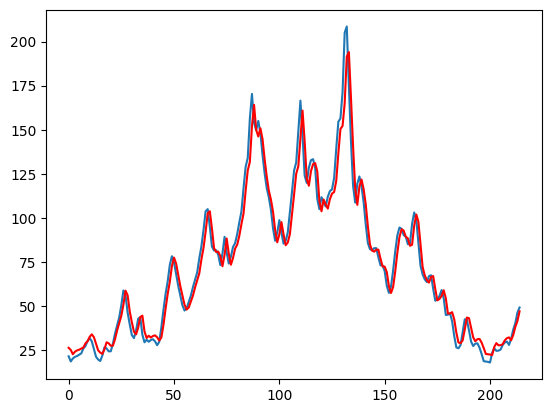

In [ ]:
plt.plot(testY)
plt.plot(prediction_lstm, color='red')
plt.show()
